In [7]:

import pandas as pd
from collections import Counter
import numpy as np
from sklearn.cross_validation import cross_val_score

df = pd.read_csv('mammographic_masses.csv')
df = df.replace({'?': ''})
X_df = df[['Age','Shape','Margin','Density',]]
Y_df = df['Severity']


Xdummies_df = pd.get_dummies(X_df).astype(int)
X = Xdummies_df.values
Y = Y_df.values

porcentagem_de_treino = 0.8
porcentagem_de_teste = 0.2

tamanho_de_treino = int(porcentagem_de_treino * len(Y))
tamanho_de_teste = int(porcentagem_de_teste * len(Y))

treino_dados = X[:tamanho_de_treino]
treino_marcacoes = Y[:tamanho_de_treino]

fim_de_treino = tamanho_de_treino + tamanho_de_teste

teste_dados = X[tamanho_de_treino:fim_de_treino]
teste_marcacoes = Y[tamanho_de_treino:fim_de_treino]

def fit_and_predict(nome, modelo, treino_dados, treino_marcacoes,teste_dados, teste_marcacoes):
    modelo.fit(treino_dados, treino_marcacoes)
    resultado = modelo.predict(teste_dados)
    acertos = 0
    tamanho = len(teste_marcacoes)
    for i in range(tamanho):
        if teste_marcacoes[i] == resultado[i]:
            acertos = acertos + 1
    print('Acerto %s: %.2f' % (nome, (acertos* 100/ tamanho)))
    
    return resultado

In [8]:
from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
resultado = fit_and_predict("MultinomialNB", modeloMultinomial, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)

k = 8
scores = cross_val_score(modeloMultinomial,treino_dados,treino_marcacoes,cv = k)
tamanho = len(teste_marcacoes)
taxa_de_acerto = np.mean(scores)
print('Acerto MultinomialNB com K-fold:{:.2f}%'.format((taxa_de_acerto * 100)))

from sklearn.metrics import confusion_matrix

confusion_matrix(teste_marcacoes, resultado)

Acerto MultinomialNB: 80.21
Acerto MultinomialNB com K-fold:80.21%


array([[80, 20],
       [18, 74]], dtype=int64)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()
resultadoAdaBoost = fit_and_predict("AdaBoostClassifier", modeloAdaBoost, treino_dados,treino_marcacoes, teste_dados, teste_marcacoes)

k = 8
scores = cross_val_score(modeloAdaBoost,treino_dados,treino_marcacoes,cv = k)
tamanho = len(teste_marcacoes)
taxa_de_acerto = np.mean(scores)
print('Acerto AdaBoost com K-fold:{:.2f}%'.format((taxa_de_acerto * 100)))

confusion_matrix(teste_marcacoes, resultadoAdaBoost)

Acerto AdaBoostClassifier: 78.65
Acerto AdaBoost com K-fold:76.56%


array([[83, 17],
       [24, 68]], dtype=int64)

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
resultadoOneVsRest = fit_and_predict("OneVsRest", modeloOneVsRest,treino_dados, treino_marcacoes,teste_dados, teste_marcacoes)

k = 8
scores = cross_val_score(modeloOneVsRest,treino_dados,treino_marcacoes,cv = k)
tamanho = len(teste_marcacoes)
taxa_de_acerto = np.mean(scores)
print('Acerto OneVsRest com K-fold:{:.2f}%'.format((taxa_de_acerto * 100)))

confusion_matrix(teste_marcacoes, resultadoOneVsRest)

Acerto OneVsRest: 81.25
Acerto OneVsRest com K-fold:76.31%


array([[83, 17],
       [19, 73]], dtype=int64)

In [11]:
from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))
resultadoOneVsOne = fit_and_predict("OneVsOne", modeloOneVsOne,treino_dados, treino_marcacoes,teste_dados, teste_marcacoes)

k = 8
scores = cross_val_score(modeloOneVsOne,treino_dados,treino_marcacoes,cv = k)
tamanho = len(teste_marcacoes)
taxa_de_acerto = np.mean(scores)
print('Acerto OneVsOne com K-fold:{:.2f}%'.format((taxa_de_acerto * 100)))

confusion_matrix(teste_marcacoes, resultadoOneVsOne)

Acerto OneVsOne: 81.25
Acerto OneVsOne com K-fold:76.31%


array([[83, 17],
       [19, 73]], dtype=int64)

In [12]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
resultadoTree = fit_and_predict("DecisionTree", tree,treino_dados, treino_marcacoes, teste_dados, teste_marcacoes)

k = 8
scores = cross_val_score(tree,treino_dados,treino_marcacoes,cv = k)
tamanho = len(teste_marcacoes)
taxa_de_acerto = np.mean(scores)
print('Acerto DecisionTree com K-fold:{:.2f}%'.format((taxa_de_acerto * 100)))

confusion_matrix(teste_marcacoes, resultadoTree)

Acerto DecisionTree: 68.75
Acerto DecisionTree com K-fold:74.61%


array([[76, 24],
       [36, 56]], dtype=int64)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

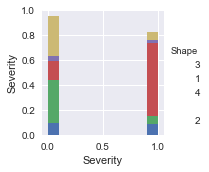

In [14]:
sns.pairplot(df,hue='Shape')

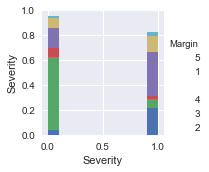

In [86]:
sns.pairplot(df,hue='Margin')

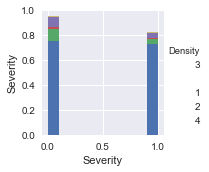

In [88]:
sns.pairplot(df,hue='Density')